# DeepLGR Results Visualization

This notebook visualizes training history and evaluation results for all periods (P1-P4).

## Contents:
1. Training curves (loss over epochs)
2. Performance comparison across periods
3. Baseline vs Extended model comparison

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Figure size defaults
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

## 1. Load Training History

In [2]:
# Load training history from all periods
periods = ['P1', 'P2', 'P3', 'P4']
models = ['baseline', 'extended']

history_data = {}

for period in periods:
    history_data[period] = {}
    for model in models:
        history_file = f'../checkpoints_per_period/{period}_{model}/history.json'
        if os.path.exists(history_file):
            with open(history_file, 'r') as f:
                history_data[period][model] = json.load(f)
            print(f"Loaded {period} {model}: {len(history_data[period][model]['train_loss'])} epochs")
        else:
            print(f"Warning: {history_file} not found")

print(f"\nLoaded history for {len(history_data)} periods")

Loaded P1 baseline: 91 epochs
Loaded P1 extended: 109 epochs
Loaded P2 baseline: 56 epochs
Loaded P2 extended: 75 epochs
Loaded P3 baseline: 117 epochs
Loaded P3 extended: 133 epochs
Loaded P4 baseline: 83 epochs
Loaded P4 extended: 59 epochs

Loaded history for 4 periods


## 2. Training Curves - Individual Periods

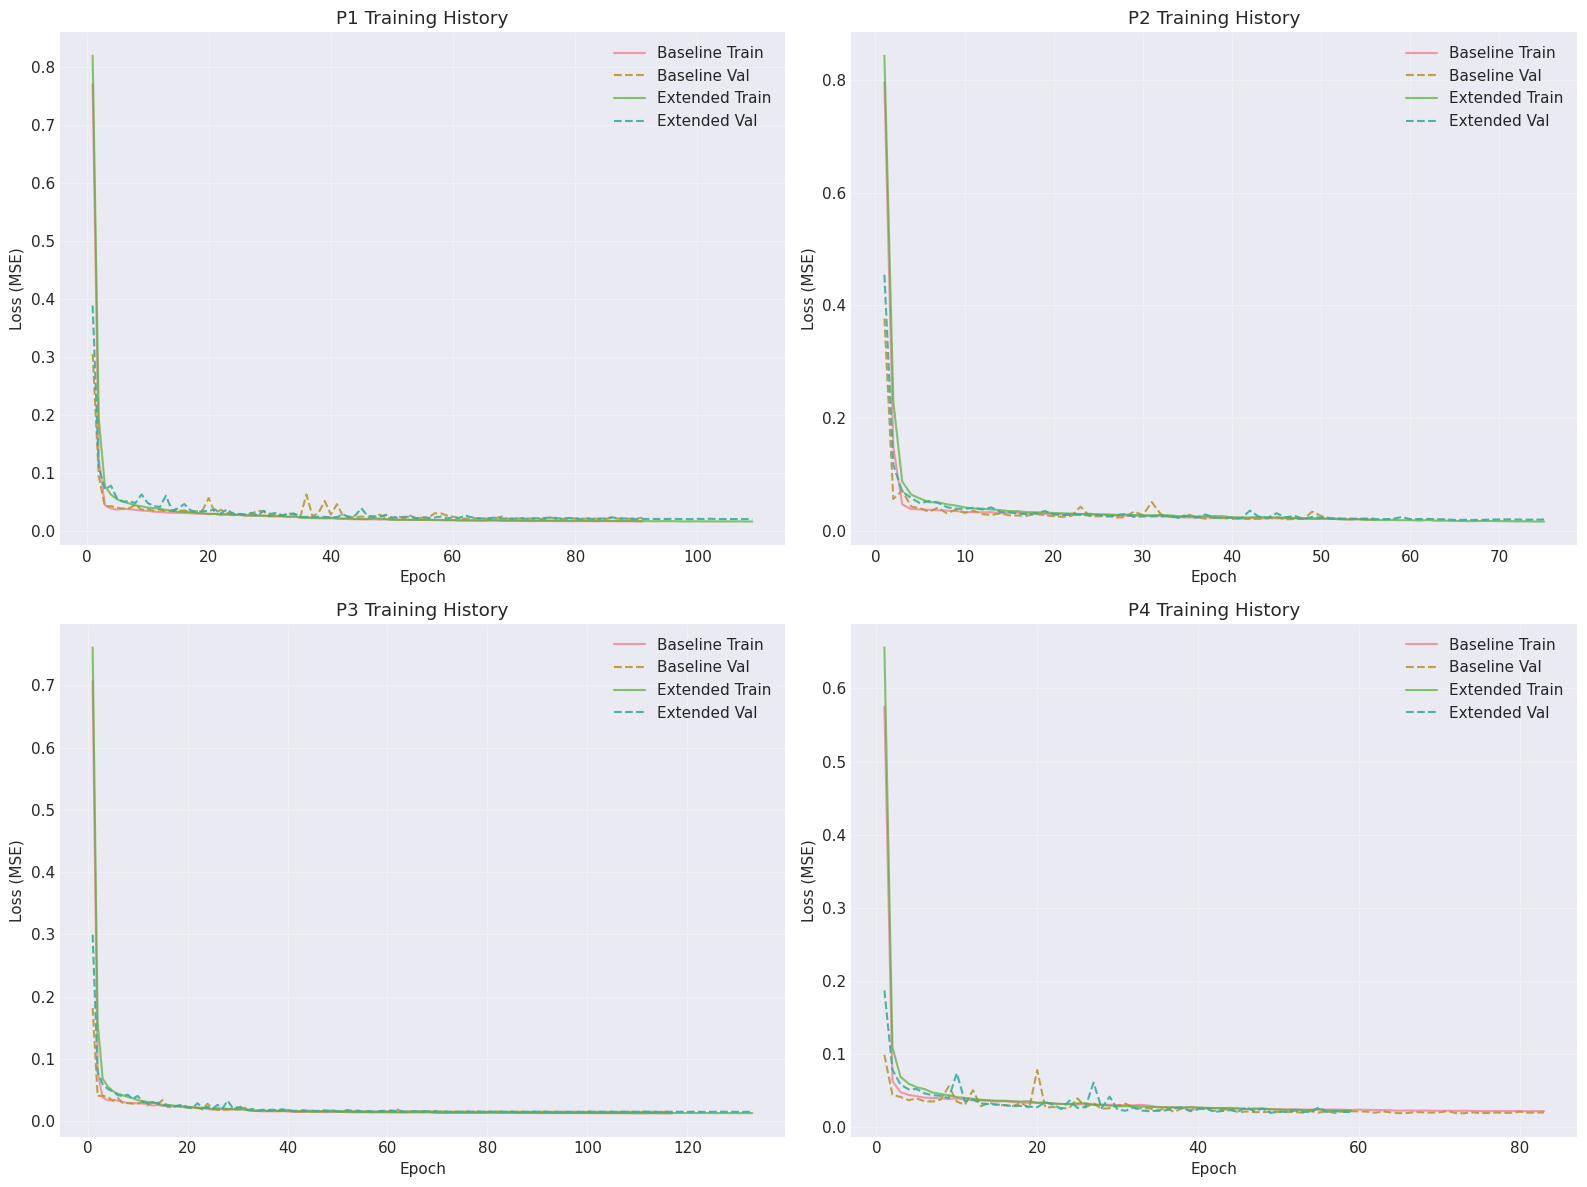

Saved: results_per_period/training_curves_all_periods.png


In [3]:
# Plot training curves for each period (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, period in enumerate(periods):
    ax = axes[idx]
    
    for model in models:
        if model in history_data[period]:
            history = history_data[period][model]
            epochs = range(1, len(history['train_loss']) + 1)
            
            # Plot train and val loss
            label_prefix = 'Baseline' if model == 'baseline' else 'Extended'
            ax.plot(epochs, history['train_loss'], label=f'{label_prefix} Train', linestyle='-', alpha=0.7)
            ax.plot(epochs, history['val_loss'], label=f'{label_prefix} Val', linestyle='--', alpha=0.9)
    
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss (MSE)')
    ax.set_title(f'{period} Training History')
    ax.legend()
    ax.grid(True, alpha=0.3)
    # ax.set_yscale('log')  # Log scale for better visualization

plt.tight_layout()
# plt.savefig('../results_per_period/training_curves_all_periods.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: results_per_period/training_curves_all_periods.png")

## 3. Baseline vs Extended Comparison

In [17]:
all_vals = []
for period in periods:
    for model in ["baseline", "extended"]:
        if model in history_data[period]:
            all_vals.extend(history_data[period][model]["val_loss"])

vmin, vmax = min(all_vals), max(all_vals)
print(vmin, vmax)


0.014700363243096754 0.45432315667470297


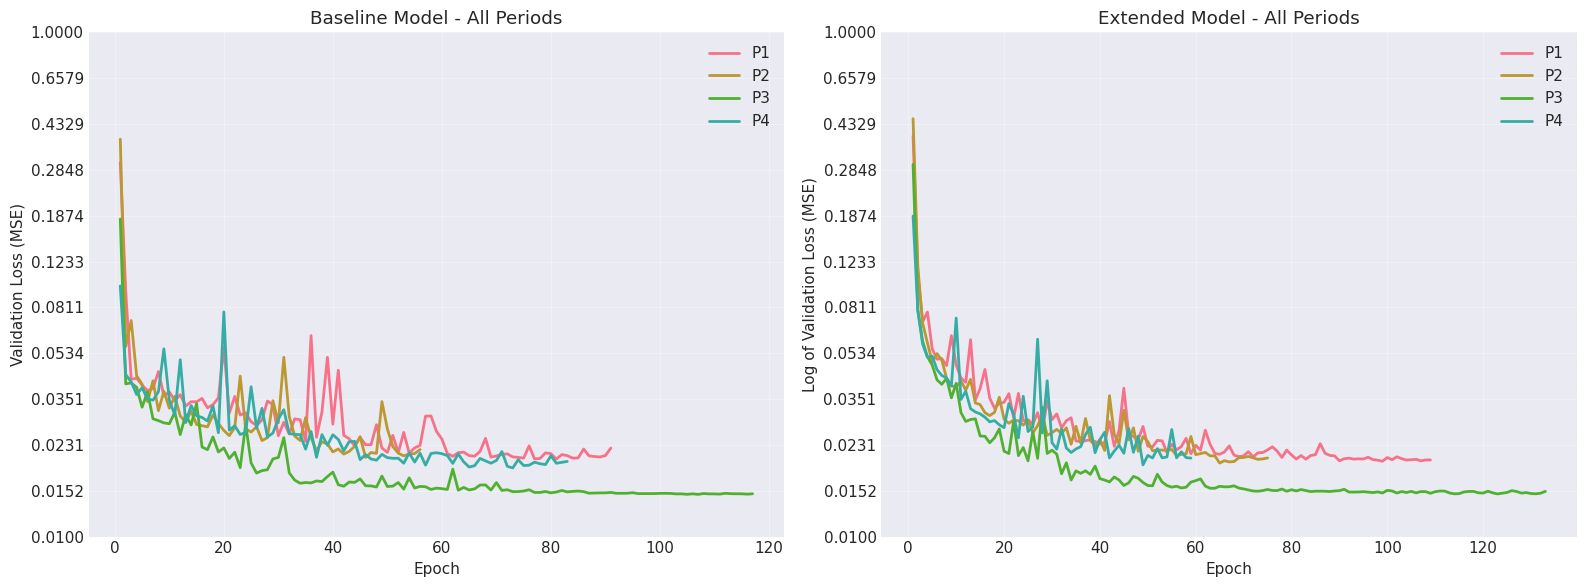

Saved: results_per_period/baseline_vs_extended_comparison.png


In [ ]:
from matplotlib.ticker import ScalarFormatter

# Plot baseline vs extended validation loss side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: All baselines
ax = axes[0]
for period in periods:
    if 'baseline' in history_data[period]:
        history = history_data[period]['baseline']
        epochs = range(1, len(history['val_loss']) + 1)
        ax.plot(epochs, history['val_loss'], label=period, linewidth=2)

ax.set_xlabel('Epoch')
ax.set_ylabel('Log of Validation Loss (MSE)')
ax.set_title('Baseline Model - All Periods')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_yscale('log')

# Right: All extended
ax = axes[1]
for period in periods:
    if 'extended' in history_data[period]:
        history = history_data[period]['extended']
        epochs = range(1, len(history['val_loss']) + 1)
        ax.plot(epochs, history['val_loss'], label=period, linewidth=2)

ax.set_xlabel('Epoch')
ax.set_ylabel('Log of Validation Loss (MSE)')
ax.set_title('Extended Model - All Periods')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_yscale('log')


# Create about 12 log-spaced ticks in your actual data range
yticks = np.logspace(
    np.floor(np.log10(vmin)),
    np.ceil(np.log10(vmax)),
    num=12
)

for ax in axes:
    ax.set_yscale('log')
    ax.set_yticks(yticks)

    # Use normal number formatting (e.g. 0.02, 0.05, 0.1)
    fmt = ScalarFormatter()
    fmt.set_scientific(False)
    ax.yaxis.set_major_formatter(fmt)



plt.tight_layout()
plt.savefig('../results_per_period/baseline_vs_extended_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: results_per_period/baseline_vs_extended_comparison.png")


## 4. Load Evaluation Results

In [5]:
# Load evaluation results from CSV
results_csv = '../results_per_period/all_periods_results.csv'

if os.path.exists(results_csv):
    df = pd.read_csv(results_csv)
    print(f"Loaded results for {len(df)} experiments\n")
    print(df)
else:
    print(f"Warning: {results_csv} not found")
    df = None

Loaded results for 8 experiments

  Period     Model      MAE  SMAPE  MAE_Inflow  MAE_Outflow  Train_Samples  \
0     P1  Baseline  12.0398  14.11     12.0026      12.0770            NaN   
1     P1  Extended  12.0300  14.20     11.9915      12.0685            NaN   
2     P2  Baseline  13.0672  13.19     13.0394      13.0950            NaN   
3     P2  Extended  12.6845  14.13     12.6467      12.7224            NaN   
4     P3  Baseline  12.7757  13.84     12.7434      12.8081            NaN   
5     P3  Extended  12.8667  13.99     12.8342      12.8992            NaN   
6     P4  Baseline  11.6152  14.74     11.5872      11.6432            NaN   
7     P4  Extended  11.8912  16.14     11.8672      11.9153            NaN   

   Val_Samples  Test_Samples  Best_Epoch  Val_Loss  
0          NaN           246          81  0.020289  
1          NaN           246          99  0.019906  
2          NaN           237          46  0.020598  
3          NaN           237          65  0.019571 

## 5. MAE Comparison Across Periods

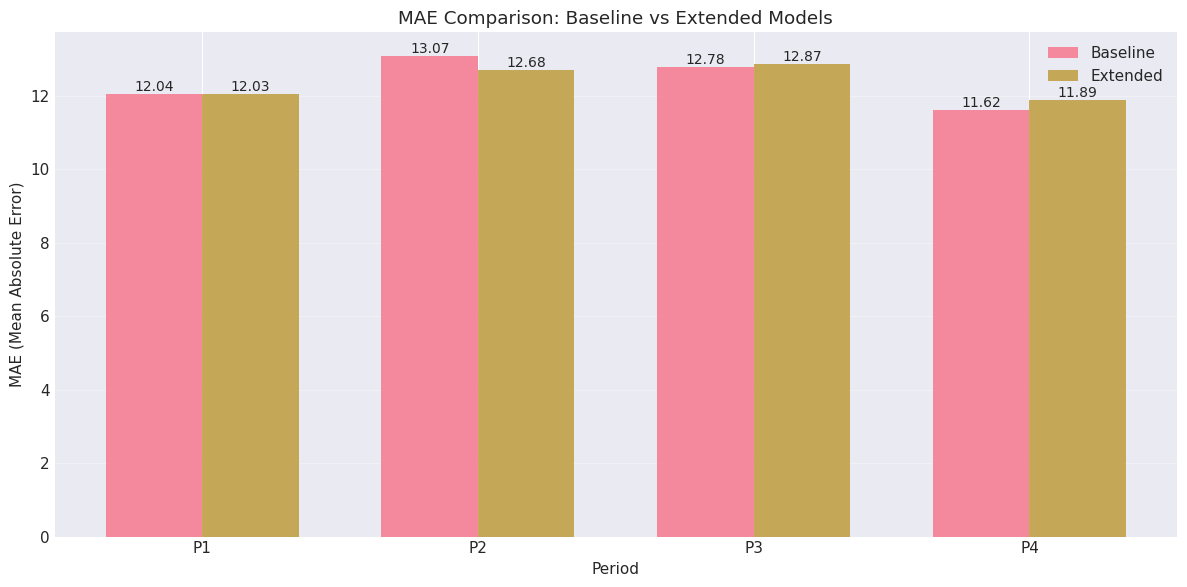

Saved: results_per_period/mae_comparison.png


In [6]:
if df is not None:
    # Bar plot: MAE comparison
    fig, ax = plt.subplots(figsize=(12, 6))
    
    x = np.arange(len(periods))
    width = 0.35
    
    baseline_maes = [df[(df['Period'] == p) & (df['Model'] == 'Baseline')]['MAE'].values[0] 
                     if len(df[(df['Period'] == p) & (df['Model'] == 'Baseline')]) > 0 else 0 
                     for p in periods]
    extended_maes = [df[(df['Period'] == p) & (df['Model'] == 'Extended')]['MAE'].values[0] 
                     if len(df[(df['Period'] == p) & (df['Model'] == 'Extended')]) > 0 else 0 
                     for p in periods]
    
    bars1 = ax.bar(x - width/2, baseline_maes, width, label='Baseline', alpha=0.8)
    bars2 = ax.bar(x + width/2, extended_maes, width, label='Extended', alpha=0.8)
    
    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.2f}',
                       ha='center', va='bottom', fontsize=10)
    
    ax.set_xlabel('Period')
    ax.set_ylabel('MAE (Mean Absolute Error)')
    ax.set_title('MAE Comparison: Baseline vs Extended Models')
    ax.set_xticks(x)
    ax.set_xticklabels(periods)
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('../results_per_period/mae_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Saved: results_per_period/mae_comparison.png")

## 6. SMAPE Comparison

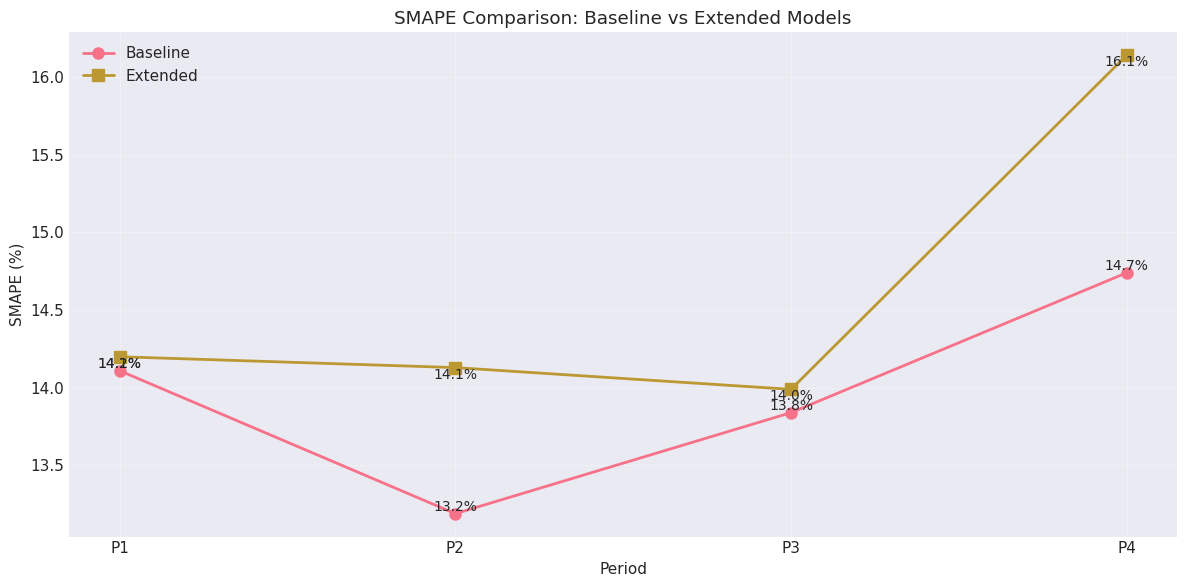

Saved: results_per_period/smape_comparison.png


In [7]:
if df is not None:
    # Line plot: SMAPE across periods
    fig, ax = plt.subplots(figsize=(12, 6))
    
    baseline_smapes = [df[(df['Period'] == p) & (df['Model'] == 'Baseline')]['SMAPE'].values[0] 
                       if len(df[(df['Period'] == p) & (df['Model'] == 'Baseline')]) > 0 else 0 
                       for p in periods]
    extended_smapes = [df[(df['Period'] == p) & (df['Model'] == 'Extended')]['SMAPE'].values[0] 
                       if len(df[(df['Period'] == p) & (df['Model'] == 'Extended')]) > 0 else 0 
                       for p in periods]
    
    ax.plot(periods, baseline_smapes, marker='o', linewidth=2, markersize=8, label='Baseline')
    ax.plot(periods, extended_smapes, marker='s', linewidth=2, markersize=8, label='Extended')
    
    # Add value labels
    for i, (b, e) in enumerate(zip(baseline_smapes, extended_smapes)):
        if b > 0:
            ax.text(i, b, f'{b:.1f}%', ha='center', va='bottom', fontsize=10)
        if e > 0:
            ax.text(i, e, f'{e:.1f}%', ha='center', va='top', fontsize=10)
    
    ax.set_xlabel('Period')
    ax.set_ylabel('SMAPE (%)')
    ax.set_title('SMAPE Comparison: Baseline vs Extended Models')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../results_per_period/smape_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Saved: results_per_period/smape_comparison.png")

## 7. Inflow vs Outflow MAE

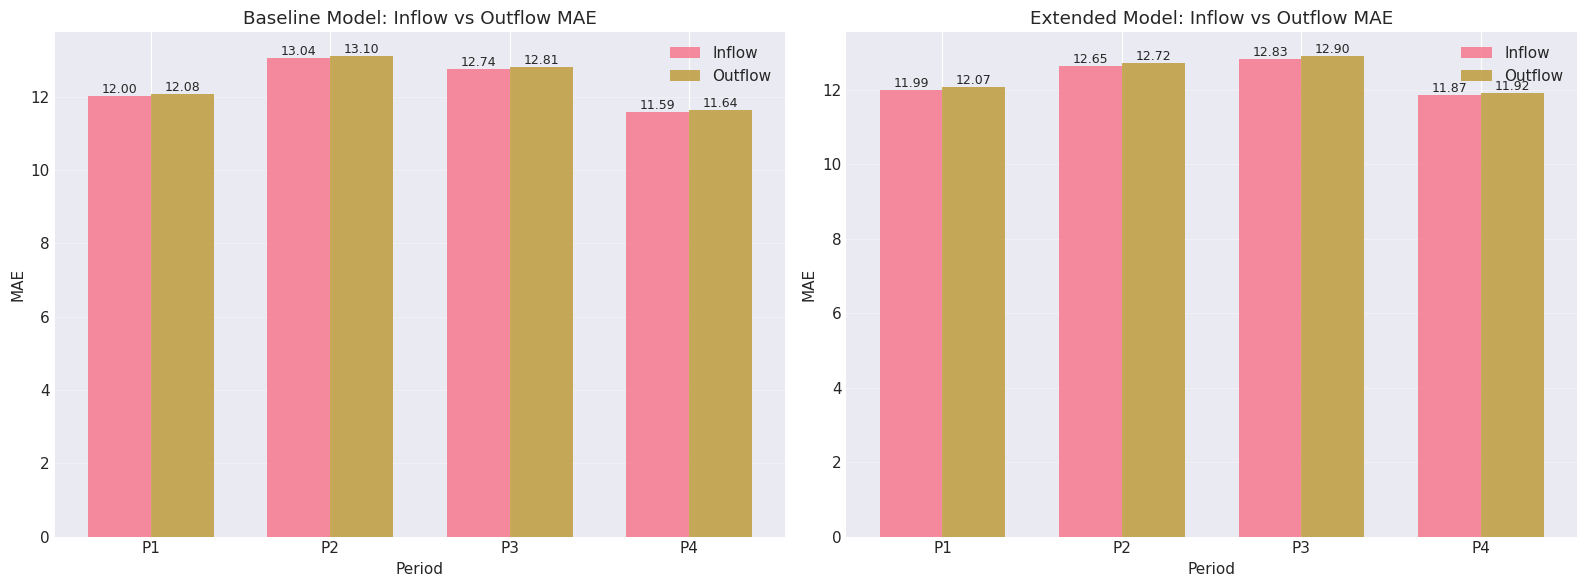

Saved: results_per_period/inflow_outflow_comparison.png


In [8]:
if df is not None:
    # Grouped bar chart for inflow/outflow
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    for model_idx, model_name in enumerate(['Baseline', 'Extended']):
        ax = axes[model_idx]
        
        x = np.arange(len(periods))
        width = 0.35
        
        inflow_maes = [df[(df['Period'] == p) & (df['Model'] == model_name)]['MAE_Inflow'].values[0] 
                       if len(df[(df['Period'] == p) & (df['Model'] == model_name)]) > 0 else 0 
                       for p in periods]
        outflow_maes = [df[(df['Period'] == p) & (df['Model'] == model_name)]['MAE_Outflow'].values[0] 
                        if len(df[(df['Period'] == p) & (df['Model'] == model_name)]) > 0 else 0 
                        for p in periods]
        
        bars1 = ax.bar(x - width/2, inflow_maes, width, label='Inflow', alpha=0.8)
        bars2 = ax.bar(x + width/2, outflow_maes, width, label='Outflow', alpha=0.8)
        
        # Add value labels
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                if height > 0:
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.2f}',
                           ha='center', va='bottom', fontsize=9)
        
        ax.set_xlabel('Period')
        ax.set_ylabel('MAE')
        ax.set_title(f'{model_name} Model: Inflow vs Outflow MAE')
        ax.set_xticks(x)
        ax.set_xticklabels(periods)
        ax.legend()
        ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('../results_per_period/inflow_outflow_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Saved: results_per_period/inflow_outflow_comparison.png")

## 8. Summary Statistics

In [9]:
if df is not None:
    print("="*70)
    print("SUMMARY STATISTICS")
    print("="*70)
    print()
    
    # Average performance
    baseline_avg = df[df['Model'] == 'Baseline']['MAE'].mean()
    extended_avg = df[df['Model'] == 'Extended']['MAE'].mean()
    
    print(f"Average MAE across all periods:")
    print(f"  Baseline:  {baseline_avg:.4f}")
    print(f"  Extended:  {extended_avg:.4f}")
    
    improvement = ((baseline_avg - extended_avg) / baseline_avg) * 100
    if improvement > 0:
        print(f"  Improvement: {improvement:.2f}%")
    else:
        print(f"  Degradation: {-improvement:.2f}%")
    
    print()
    print("Best performing period:")
    best_baseline = df[df['Model'] == 'Baseline'].loc[df[df['Model'] == 'Baseline']['MAE'].idxmin()]
    best_extended = df[df['Model'] == 'Extended'].loc[df[df['Model'] == 'Extended']['MAE'].idxmin()]
    print(f"  Baseline:  {best_baseline['Period']} (MAE={best_baseline['MAE']:.4f})")
    print(f"  Extended:  {best_extended['Period']} (MAE={best_extended['MAE']:.4f})")
    
    print()
    print("="*70)

SUMMARY STATISTICS

Average MAE across all periods:
  Baseline:  12.3745
  Extended:  12.3681
  Improvement: 0.05%

Best performing period:
  Baseline:  P4 (MAE=11.6152)
  Extended:  P4 (MAE=11.8912)



## 9. Final Comparison Table

In [10]:
if df is not None:
    # Create a pivot table for easy comparison
    comparison = df.pivot(index='Period', columns='Model', values=['MAE', 'SMAPE'])
    comparison.columns = ['_'.join(col).strip() for col in comparison.columns.values]
    comparison['MAE_Improvement_%'] = ((comparison['MAE_Baseline'] - comparison['MAE_Extended']) / comparison['MAE_Baseline'] * 100)
    
    print("\nDetailed Comparison Table:")
    print(comparison.round(4))
    
    # Save to CSV
    comparison.to_csv('../results_per_period/comparison_table.csv')
    print("\nSaved: results_per_period/comparison_table.csv")


Detailed Comparison Table:
        MAE_Baseline  MAE_Extended  SMAPE_Baseline  SMAPE_Extended  \
Period                                                               
P1           12.0398       12.0300           14.11           14.20   
P2           13.0672       12.6845           13.19           14.13   
P3           12.7757       12.8667           13.84           13.99   
P4           11.6152       11.8912           14.74           16.14   

        MAE_Improvement_%  
Period                     
P1                 0.0814  
P2                 2.9287  
P3                -0.7123  
P4                -2.3762  

Saved: results_per_period/comparison_table.csv
